# Datascience Group Project

In [74]:
# The source from which all knowledge comes:

# Labour force characteristics, annual
# https://open.canada.ca/data/en/dataset/621006f5-bc1b-4893-be77-ac5a6de35f0a
gov_site = 'https://www150.statcan.gc.ca/n1/tbl/csv/14100391-eng.zip'


# Labour force characteristics by sex and detailed age group, monthly, unadjusted for seasonality
# https://open.canada.ca/data/en/dataset/17b836c1-e7ec-48b9-b7a3-f370f1006975
gov_site_2= "https://www150.statcan.gc.ca/n1/tbl/csv/14100017-eng.zip"

#Labour force characteristics by occupation, annual
gov_site_3="https://www150.statcan.gc.ca/n1/tbl/csv/14100335-eng.zip"


In [75]:
# Run This if you want to download and extract the data 
import zipfile, io
import requests
import warnings
warnings.filterwarnings("ignore")

import os.path

if not os.path.isfile('./rawcsv/14100391.csv'):
    # This is for the annual characteristics
    r = requests.get(gov_site, verify=False, )
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("./rawcsv")

if not os.path.isfile('./rawcsv_sex_age/14100017.csv'):
    r = requests.get(gov_site_2, verify=False, )
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("./rawcsv_sex_age")

if not os.path.isfile('./rawcsv_occupation_Sex/14100335.csv'):
    r = requests.get(gov_site_3, verify=False, )
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("./rawcsv_occupation_Sex")


In [3]:
# # This only needs to be done if we want to download the zipped file (uncomment if you want to experiment)
# # https://requests.readthedocs.io/en/master/user/quickstart/#raw-response-content
# # Download the raw csv zipped
# with open("rawzippedcsv.zip", 'wb') as fd:
#     for chunk in r.iter_content(chunk_size=128):
#         fd.write(chunk)


## Step two read the csv file into pandas 


In [76]:
import pandas as pd
import numpy as np

employment_data = pd.read_csv('./rawcsv/14100391.csv', sep=',')

employment_data.head(10)

,REF_DATE,GEO,DGUID,Labour force characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Population,Persons,249,thousands,3,v1235071748,1.1,26.3,NaN,NaN,NaN,1
1,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Labour force,Persons,249,thousands,3,v1235071749,1.2,16.9,NaN,NaN,NaN,1
2,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment,Persons,249,thousands,3,v1235071750,1.3,14.5,NaN,NaN,NaN,1
3,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment,Persons,249,thousands,3,v1235071751,1.4,2.4,NaN,NaN,NaN,1
4,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Not in labour force,Persons,249,thousands,3,v1235071752,1.5,9.4,NaN,NaN,NaN,1
5,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment rate,Percentage,242,units,0,v1235071753,1.6,14.2,NaN,NaN,NaN,1
6,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Participation rate,Percentage,242,units,0,v1235071754,1.7,64.3,NaN,NaN,NaN,1
7,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment rate,Percentage,242,units,0,v1235071755,1.8,55.1,NaN,NaN,NaN,1
8,2006,"Charlottetown, Prince Edward Island",2016S0504105,Population,Persons,249,thousands,3,v1235071756,2.1,50.2,NaN,NaN,NaN,1
9,2006,"Charlottetown, Prince Edward Island",2016S0504105,Labour force,Persons,249,thousands,3,v1235071757,2.2,35.4,NaN,NaN,NaN,1


In [77]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      3480 non-null   int64  
 1   GEO                           3480 non-null   object 
 2   DGUID                         3360 non-null   object 
 3   Labour force characteristics  3480 non-null   object 
 4   UOM                           3480 non-null   object 
 5   UOM_ID                        3480 non-null   int64  
 6   SCALAR_FACTOR                 3480 non-null   object 
 7   SCALAR_ID                     3480 non-null   int64  
 8   VECTOR                        3480 non-null   object 
 9   COORDINATE                    3480 non-null   float64
 10  VALUE                         3434 non-null   float64
 11  STATUS                        46 non-null     object 
 12  SYMBOL                        0 non-null      float64
 13  TER

In [78]:
employment_data['REF_DATE'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [79]:
employment_data['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'], dtype=object)

## Sex and age breakdow


In [82]:
employment_data_sex_age = pd.read_csv('./rawcsv_sex_age/14100017.csv', sep=',')


employment_data_sex_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934920 entries, 0 to 3934919
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   REF_DATE                      object 
 1   GEO                           object 
 2   DGUID                         object 
 3   Labour force characteristics  object 
 4   Sex                           object 
 5   Age group                     object 
 6   UOM                           object 
 7   UOM_ID                        int64  
 8   SCALAR_FACTOR                 object 
 9   SCALAR_ID                     int64  
 10  VECTOR                        object 
 11  COORDINATE                    object 
 12  VALUE                         float64
 13  STATUS                        object 
 14  SYMBOL                        float64
 15  TERMINATED                    float64
 16  DECIMALS                      int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 510.4+ MB


In [83]:
employment_data_sex_age.head()


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-01,Canada,2016A000011124,Population,Both sexes,15 years and over,Persons,249,thousands,3,v2091030,1.1.1.1,16852.4,NaN,NaN,NaN,1
1,1976-01,Canada,2016A000011124,Population,Both sexes,15 to 24 years,Persons,249,thousands,3,v2091031,1.1.1.2,4509.9,NaN,NaN,NaN,1
2,1976-01,Canada,2016A000011124,Population,Both sexes,25 years and over,Persons,249,thousands,3,v2091032,1.1.1.3,12342.5,NaN,NaN,NaN,1
3,1976-01,Canada,2016A000011124,Population,Both sexes,25 to 44 years,Persons,249,thousands,3,v2091033,1.1.1.4,6162.4,NaN,NaN,NaN,1
4,1976-01,Canada,2016A000011124,Population,Both sexes,45 to 64 years,Persons,249,thousands,3,v19650582,1.1.1.22,4343.6,NaN,NaN,NaN,1


In [84]:
employment_data_sex_age['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [85]:
employment_data_sex_age['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Not in labour force',
       'Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

## Occupation and sex breakdown


In [86]:
employment_data_occupation_sex = pd.read_csv('./rawcsv_occupation_Sex/14100335.csv', sep=',')
employment_data_occupation_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403920 entries, 0 to 403919
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   REF_DATE                                    403920 non-null  int64  
 1   GEO                                         403920 non-null  object 
 2   DGUID                                       403920 non-null  object 
 3   Labour force characteristics                403920 non-null  object 
 4   National Occupational Classification (NOC)  403920 non-null  object 
 5   Sex                                         403920 non-null  object 
 6   UOM                                         403920 non-null  object 
 7   UOM_ID                                      403920 non-null  int64  
 8   SCALAR_FACTOR                               403920 non-null  object 
 9   SCALAR_ID                                   403920 non-null  int64  
 

In [87]:
employment_data_occupation_sex.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,National Occupational Classification (NOC),Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Both sexes,Persons,249,units,0,v1063550054,1.1.1.1,13526.0,NaN,NaN,NaN,1
1,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Males,Persons,249,units,0,v1063550055,1.1.1.2,7680.2,NaN,NaN,NaN,1
2,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Females,Persons,249,units,0,v1063550056,1.1.1.3,5845.8,NaN,NaN,NaN,1
3,1987,Canada,2016A000011124,Labour force,Management occupations [0],Both sexes,Persons,249,units,0,v1063550057,1.1.2.1,1372.9,NaN,NaN,NaN,1
4,1987,Canada,2016A000011124,Labour force,Management occupations [0],Males,Persons,249,units,0,v1063550058,1.1.2.2,990.9,NaN,NaN,NaN,1


Data processing notes:
- Add unitis to the column names so we know what are %'s and what are 'thousands of people'

Mention confounding factors (Jon believes industry is a big one) Confounding factors and how we deal with them will be pretty critical.

# Processing the data

## Processing the geographic data.

Using the employment dataframe, we want to generate a new table with following colums
'Ref_Date', 'GEO', 'Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'
       
The field in the table will be 'value'

In [88]:
# Make sure the scale factor doesn't change
employment_data['SCALAR_FACTOR'].unique()

array(['thousands', 'units'], dtype=object)

In [89]:
#Make a slice the dataframe to the 3 columns of interes
simple_employment_data=employment_data[['REF_DATE','GEO','Labour force characteristics','VALUE']]


In [90]:
simple_employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      3480 non-null   int64  
 1   GEO                           3480 non-null   object 
 2   Labour force characteristics  3480 non-null   object 
 3   VALUE                         3434 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 108.9+ KB


In [91]:
# Pivoting the table kept giving and error, turns out we needed two keys to be able to pivot the data.
simple_employment_data[simple_employment_data['GEO']=='Corner Brook, Newfoundland and Labrador'].count()

REF_DATE                        120
GEO                             120
Labour force characteristics    120
VALUE                           120
dtype: int64

In [92]:
simple_employment_data.pivot(index=['REF_DATE','GEO'], columns='Labour force characteristics', values='VALUE')

Labour force characteristics                  Employment  Employment rate  \
REF_DATE GEO                                                                
2006     Bathurst, New Brunswick                    12.9             46.6   
         Brandon, Manitoba                          26.9             63.3   
         Cape Breton, Nova Scotia                   41.9             46.6   
         Charlottetown, Prince Edward Island        32.7             65.1   
         Chatham-Kent, Ontario                      57.7             63.6   
...                                                  ...              ...   
2020     Sault Ste. Marie, Ontario                  37.9             56.2   
         Summerside, Prince Edward Island            8.1             53.6   
         Timmins, Ontario                           24.0             63.5   
         Truro, Nova Scotia                         20.7             52.5   
         Wood Buffalo, Alberta                      44.0             73.2   

Labour force characteristics                  Labour force  \
REF_DATE GEO                                                 
2006     Bathurst, New Brunswick                      14.8   
         Brandon, Manitoba                            28.3   
         Cape Breton, Nova Scotia                     48.3   
         Charlottetown, Prince Edward Island          35.4   
         Chatham-Kent, Ontario                        62.5   
...                                                    ...   
2020     Sault Ste. Marie, Ontario                    41.0   
         Summerside, Prince Edward Island              8.9   
         Timmins, Ontario                             25.4   
         Truro, Nova Scotia                           22.7   
         Wood Buffalo, Alberta                        48.1   

Labour force characteristics                  Not in labour force  \
REF_DATE GEO                                                        
2006     Bathurst, New Brunswick                             12.9   
         Brandon, Manitoba                                   14.2   
         Cape Breton, Nova Scotia                            41.7   
         Charlottetown, Prince Edward Island                 14.9   
         Chatham-Kent, Ontario                               28.2   
...                                                           ...   
2020     Sault Ste. Marie, Ontario                           26.3   
         Summerside, Prince Edward Island                     6.1   
         Timmins, Ontario                                    12.4   
         Truro, Nova Scotia                                  16.7   
         Wood Buffalo, Alberta                               12.0   

Labour force characteristics                  Participation rate  Population  \
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                            53.4        27.7   
         Brandon, Manitoba                                  66.6        42.5   
         Cape Breton, Nova Scotia                           53.7        90.0   
         Charlottetown, Prince Edward Island                70.5        50.2   
         Chatham-Kent, Ontario                              68.9        90.7   
...                                                          ...         ...   
2020     Sault Ste. Marie, Ontario                          60.8        67.4   
         Summerside, Prince Edward Island                   58.9        15.1   
         Timmins, Ontario                                   67.2        37.8   
         Truro, Nova Scotia                                 57.6        39.4   
         Wood Buffalo, Alberta                              80.0        60.1   

Labour force characteristics                  Unemployment  Unemployment rate  
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                       1.8               12.2  
         Bra

## Processing the age and sex data

This will be messier, I beleive that pivoting will require multiple keys.  These keys are:
- REF_DATE
- GEO (I believe the DGUID is redundant to this)
- Labour force characteristics
- Sex
- Age group

The value of interest will be the `VALUE` collumn.  The units of these values depend entirely on the `Labour force characteristics` column.


In [93]:
simple_employment_data_age_sex=employment_data_sex_age[['REF_DATE','GEO','Labour force characteristics','Sex','Age group','VALUE']]
simple_employment_data_age_sex.head()

,REF_DATE,GEO,Labour force characteristics,Sex,Age group,VALUE
0,1976-01,Canada,Population,Both sexes,15 years and over,16852.4
1,1976-01,Canada,Population,Both sexes,15 to 24 years,4509.9
2,1976-01,Canada,Population,Both sexes,25 years and over,12342.5
3,1976-01,Canada,Population,Both sexes,25 to 44 years,6162.4
4,1976-01,Canada,Population,Both sexes,45 to 64 years,4343.6


In [94]:
simple_employment_data_age_sex[simple_employment_data_age_sex['VALUE'].isna()]

,REF_DATE,GEO,Labour force characteristics,Sex,Age group,VALUE
351,1976-01,Canada,Unemployment,Both sexes,70 years and over,NaN
373,1976-01,Canada,Unemployment,Males,70 years and over,NaN
393,1976-01,Canada,Unemployment,Females,65 years and over,NaN
394,1976-01,Canada,Unemployment,Females,65 to 69 years,NaN
395,1976-01,Canada,Unemployment,Females,70 years and over,NaN
...,...,...,...,...,...,...
3934083,2021-02,Alberta,Unemployment rate,Both sexes,70 years and over,NaN
3934105,2021-02,Alberta,Unemployment rate,Males,70 years and over,NaN
3934127,2021-02,Alberta,Unemployment rate,Females,70 years and over,NaN
3934655,2021-02,British Columbia,Unemployment,Females,70 years and over,NaN


In [95]:
simple_employment_data_age_sex.pivot(index=['REF_DATE','GEO','Sex','Age group'], columns='Labour force characteristics', values='VALUE')

Labour force characteristics                        Employment  \
REF_DATE GEO          Sex        Age group                       
1976-01  Alberta      Both sexes 15 to 19 years           85.1   
                                 15 to 24 years          212.3   
                                 15 to 64 years          771.0   
                                 15 years and over       787.8   
                                 20 to 24 years          127.2   
...                                                        ...   
2021-02  Saskatchewan Males      55 years and over        69.8   
                                 60 to 64 years           20.9   
                                 65 to 69 years            9.7   
                                 65 years and over        20.0   
                                 70 years and over        10.3   

Labour force characteristics                        Employment rate  \
REF_DATE GEO          Sex        Age group                            
1976-01  Alberta      Both sexes 15 to 19 years                46.4   
                                 15 to 24 years                58.6   
                                 15 to 64 years                66.8   
                                 15 years and over             61.7   
                                 20 to 24 years                71.1   
...                                                             ...   
2021-02  Saskatchewan Males      55 years and over             44.2   
                                 60 to 64 years                58.1   
                                 65 to 69 years                31.6   
                                 65 years and over             23.4   
                                 70 years and over             18.8   

Labour force characteristics                        Full-time employment  \
REF_DATE GEO          Sex        Age group                                 
1976-01  Alberta      Both sexes 15 to 19 years                     41.8   
                                 15 to 24 years                    152.3   
                                 15 to 64 years                    642.7   
                                 15 years and over                 653.3   
                                 20 to 24 years                    110.5   
...                                                                  ...   
2021-02  Saskatchewan Males      55 years and over                  57.2   
                                 60 to 64 years                     18.5   
                                 65 to 69 years                      6.3   
                                 65 years and over                  12.4   
                                 70 years and over                   6.1   

Labour force characteristics                        Labour force  \
REF_DATE GEO          Sex        Age group                         
1976-01  Alberta      Both sexes 15 to 19 years             99.3   
                                 15 to 24 years            236.8   
                                 15 to 64 years            815.3   
                                 15 years and over         832.0   
                                 20 to 24 years            137.6   
...                                                          ...   
2021-02  Saskatchewan Males      55 years and over          73.7   
                                 60 to 64 years             23.3   
                                 65 to 69 years             10.2   
                                 65 years and over          20.9   
                                 70 years and over          10.7   

Labour force characteristics                        Not in labour force  \
REF_DATE GEO          Sex        Age group                                
1976-01  Alberta      Both sexes 15 to 19 years                    84.2   
                                 15 to 24 years                   125.5   
                                 15 to 64 y

In [96]:
# simple_employment_data_age_sex[(simple_employment_data_age_sex['Sex']=='Males')
#                                & (simple_employment_data_age_sex['GEO']=='Alberta')
#                               & (simple_employment_data_age_sex['REF_DATE']=='2020-01')]

## Processing the occupation and sex data


In [97]:
employment_data_occupation_sex.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,National Occupational Classification (NOC),Sex,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Both sexes,Persons,249,units,0,v1063550054,1.1.1.1,13526.0,NaN,NaN,NaN,1
1,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Males,Persons,249,units,0,v1063550055,1.1.1.2,7680.2,NaN,NaN,NaN,1
2,1987,Canada,2016A000011124,Labour force,"Total, all occupations",Females,Persons,249,units,0,v1063550056,1.1.1.3,5845.8,NaN,NaN,NaN,1
3,1987,Canada,2016A000011124,Labour force,Management occupations [0],Both sexes,Persons,249,units,0,v1063550057,1.1.2.1,1372.9,NaN,NaN,NaN,1
4,1987,Canada,2016A000011124,Labour force,Management occupations [0],Males,Persons,249,units,0,v1063550058,1.1.2.2,990.9,NaN,NaN,NaN,1


In [98]:
employment_data_occupation_sex['National Occupational Classification (NOC)'].unique()

array(['Total, all occupations', 'Management occupations [0]',
       'Senior management occupations [00]',
       'Specialized middle management occupations [01-05]',
       'Middle management occupations in retail and wholesale trade and customer services [06]',
       'Middle management occupations in trades, transportation, production and utilities [07-09]',
       'Business, finance and administration occupations [1]',
       'Professional occupations in business and finance [11]',
       'Administrative and financial supervisors and administrative occupations [12]',
       'Finance, insurance and related business administrative occupations [13]',
       'Office support occupations [14]',
       'Distribution, tracking and scheduling co-ordination occupations [15]',
       'Natural and applied sciences and related occupations [2]',
       'Professional occupations in natural and applied sciences [21]',
       'Technical occupations related to natural and applied sciences [22]',
  

In [99]:
employment_data_occupation_sex['Labour force characteristics'].unique()

array(['Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Unemployment rate',
       'Proportion of employment'], dtype=object)

In [100]:
employment_data_occupation_sex['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [101]:
occupation_sex_simple=employment_data_occupation_sex[['REF_DATE','GEO','Labour force characteristics','National Occupational Classification (NOC)','Sex','VALUE' ]]

In [102]:
occupation_sex_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403920 entries, 0 to 403919
Data columns (total 6 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   REF_DATE                                    403920 non-null  int64  
 1   GEO                                         403920 non-null  object 
 2   Labour force characteristics                403920 non-null  object 
 3   National Occupational Classification (NOC)  403920 non-null  object 
 4   Sex                                         403920 non-null  object 
 5   VALUE                                       290678 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 18.5+ MB


In [103]:
occupation_sex_pivot=occupation_sex_simple.pivot(index=['REF_DATE','GEO','Sex','National Occupational Classification (NOC)'], columns='Labour force characteristics', values='VALUE')
occupation_sex_pivot.head()

Labour force characteristics                                                    Employment  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                       
1987     Alberta Both sexes Administrative and financial supervisors and ad...        72.8   
                            Assemblers in manufacturing [95]                           6.8   
                            Assisting occupations in support of health serv...         9.7   
                            Business, finance and administration occupation...       219.5   
                            Care providers and educational, legal and publi...        21.3   

Labour force characteristics                                                    Full-time employment  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                                 
1987     Alberta Both sexes Administrative and financial supervisors and ad...                  63.7   
                            Assemblers in manufacturing [95]                                     6.5   
                            Assisting occupations in support of health serv...                   7.1   
                            Business, finance and administration occupation...                 182.6   
                            Care providers and educational, legal and publi...                  13.4   

Labour force characteristics                                                    Labour force  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                         
1987     Alberta Both sexes Administrative and financial supervisors and ad...          78.1   
                            Assemblers in manufacturing [95]                             7.5   
                            Assisting occupations in support of health serv...           9.9   
                            Business, finance and administration occupation...         234.9   
                            Care providers and educational, legal and publi...          23.4   

Labour force characteristics                                                    Part-time employment  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                                 
1987     Alberta Both sexes Administrative and financial supervisors and ad...                   9.1   
                            Assemblers in manufacturing [95]                                     NaN   
                            Assisting occupations in support of health serv...                   2.6   
                            Business, finance and administration occupation...                  36.9   
                            Care providers and educational, legal and publi...                   8.0   

Labour force characteristics                                                    Proportion of employment  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                                     
1987     Alberta Both sexes Administrative and financial supervisors and ad...                     100.0   
                            Assemblers in manufacturing [95]                                       100.0   
                            Assisting occupations in support of health serv...                       NaN   
                            Business, finance and administration occupation...                     100.0   
                            Care providers and educational, legal and publi...                     100.0   

Labour force characteristics                                                    Unemployment  \
REF_DATE GEO     Sex        National Occupational Classification (NOC)                         
1987     Alberta Both sexes Administrative and financial supervisors and ad...           5.3   
                            Assemblers in manufacturing [95]                             NaN   
                            Assisting occupations in support of healt

In [104]:
# occupation_sex_pivot.index

In [105]:
# occupation_sex_pivot.loc[(2020,'Canada','Males','Administrative and financial supervisors and administrative occupations [12]'),'Unemployment rate']

## Plotting data

Plotting out of a pivot table is a little counter intuitive.  If you want to select an entire index range (i.e. all dates) you need to use `slice(None)` in the index range.

For the occupation sex pivot table the indexes are `["REF_DATE","GEO","Sex", "National Occupational Classification (NOC)"]`

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))

# Does setting seaborn fix things

In [107]:
import seaborn as sns
# next line of code sets the graph style to a seaborn style
sns.set()

In [108]:
# Slice none is needed to select a range
male_can_unemp=occupation_sex_pivot.loc[(slice(None),'Canada','Males','Service support and other service occupations, n.e.c. [67]'),'Unemployment rate']
# plt.plot(male_can_unemp)

male_can_unemp.shape

(34,)

<AxesSubplot:xlabel='REF_DATE,GEO,Sex,National Occupational Classification (NOC)'>

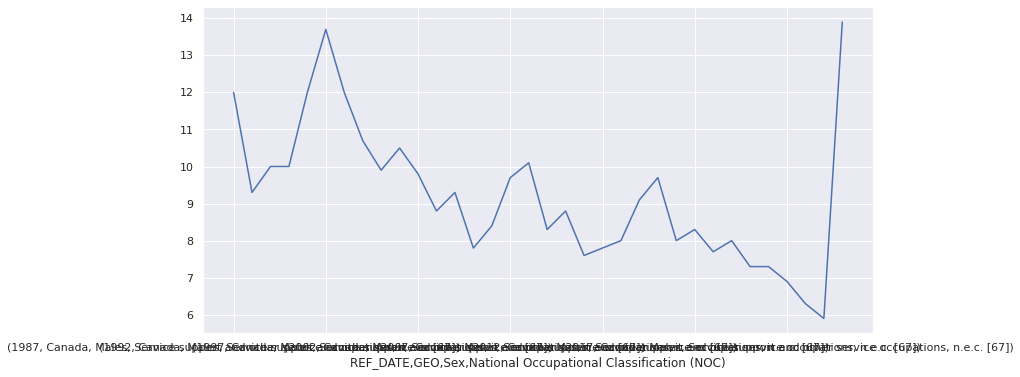

In [109]:
male_can_unemp.plot() 

### Fixing the x index

Note that the x axis is ridiculously uggly.  To fix this we need create a custom x-index that doesn't have the redundant info.

In [110]:
xindex = [x[0] for x in male_can_unemp.index]
print(xindex)

[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Text(0.5, 1.0, 'Unemployment of Service Support by year.')

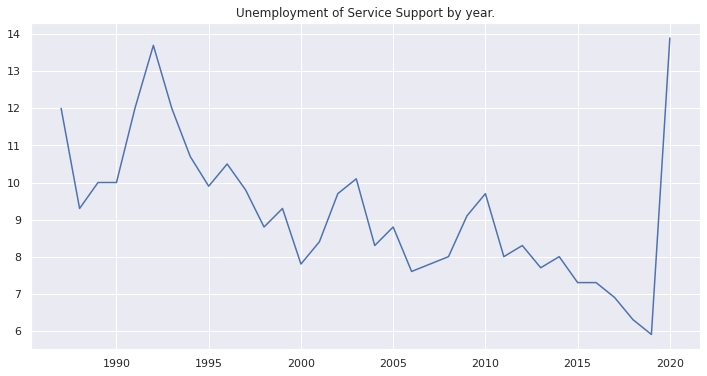

In [111]:
plt.plot(xindex, male_can_unemp)
plt.title('Unemployment of Service Support by year.')




In [112]:
all_ind_unemp=occupation_sex_pivot.loc[([2019,2020],'Canada',['Males','Females'],slice(None)),'Unemployment rate']
all_ind_unemp.head(10)

REF_DATE  GEO     Sex      National Occupational Classification (NOC)                                          
2019      Canada  Females  Administrative and financial supervisors and administrative occupations [12]             2.5
                           Assemblers in manufacturing [95]                                                         2.8
                           Assisting occupations in support of health services [34]                                 NaN
                           Business, finance and administration occupations [1]                                     2.5
                           Care providers and educational, legal and public protection support occupations [44]     6.1
                           Distribution, tracking and scheduling co-ordination occupations [15]                     3.7
                           Finance, insurance and related business administrative occupations [13]                  2.0
                           Harvesting, landscapi

In [113]:
all_ind_unemp[all_ind_unemp.isna()]

REF_DATE  GEO     Sex      National Occupational Classification (NOC)                                                         
2019      Canada  Females  Assisting occupations in support of health services [34]                                              NaN
                           Maintenance and equipment operation trades [73]                                                       NaN
                           Occupations in front-line public protection services [43]                                             NaN
                           Processing, manufacturing and utilities supervisors and central control operators [92]                NaN
                           Professional occupations in health (except nursing) [31]                                              NaN
                           Professional occupations in nursing [30]                                                              NaN
                           Senior management occupations [00]              

Let's see if any of the provincial data for these years is present

In [114]:
# These are all the NOCs with missing data for the 
list_missing_can_data=['Assisting occupations in support of health services [34]','Maintenance and equipment operation trades [73]','Occupations in front-line public protection services [43]','Processing, manufacturing and utilities supervisors and central control operators [92]','Professional occupations in health (except nursing) [31]','Professional occupations in nursing [30]','Senior management occupations [00]','Supervisors and technical occupations in natural resources, agriculture and related production [82]','Technical occupations in health [32]','Unclassified occupations']

provincial=occupation_sex_pivot.loc[([2019,2020],slice(None),['Males','Females'],list_missing_can_data),'Unemployment rate']
print(f"The length of the series is {len(provincial)}")
print(f"The number of nulls is {provincial.isna().sum()}")

The length of the series is 440
The number of nulls is 432


There are only 8 non null entries for these ten job descriptions over the 2 years 2019 and 2020

In [115]:
provincial_not_null=provincial.dropna()
provincial_not_null.head(10)

REF_DATE  GEO     Sex      National Occupational Classification (NOC)                                                         
2020      Canada  Females  Maintenance and equipment operation trades [73]                                                        8.3
                           Processing, manufacturing and utilities supervisors and central control operators [92]                 7.3
                           Supervisors and technical occupations in natural resources, agriculture and related production [82]    8.6
                           Technical occupations in health [32]                                                                   4.1
                  Males    Maintenance and equipment operation trades [73]                                                        6.1
                           Processing, manufacturing and utilities supervisors and central control operators [92]                 2.9
                           Supervisors and technical occupations in n

There are 4 jobs whic have data for 2020 but not 2019, may be able to find data from earlier years


In [116]:
fields_to_look_at_2018=['Maintenance and equipment operation trades [73]','Processing, manufacturing and utilities supervisors and central control operators [92]','Supervisors and technical occupations in natural resources, agriculture and related production [82]','Technical occupations in health [32]']

canada2018=occupation_sex_pivot.loc[([2016,2017,2018,2019,2020],'Canada',['Males','Females'],fields_to_look_at_2018),'Unemployment rate']
print(f"The length of the series is {len(canada2018)}")
print(f"The number of nulls is {canada2018.isna().sum()}")

The length of the series is 40
The number of nulls is 32


There are only data entries for 2020

We will now look at the 5 remaining trades to see if any data exists for them


In [117]:

fields_to_look_at_null2020=['Assisting occupations in support of health services [34]','Occupations in front-line public protection services [43]','Professional occupations in health (except nursing) [31]','Professional occupations in nursing [30]','Senior management occupations [00]']

canada_null2020=occupation_sex_pivot.loc[(slice(None),slice(None),['Males','Females'],fields_to_look_at_null2020),'Unemployment rate']
print(f"The length of the series is {len(canada_null2020)}")
print(f"The number of nulls is {canada_null2020.isna().sum()}")

The length of the series is 3740
The number of nulls is 3738


In [118]:
canada_null2020[canada_null2020.notna()]

REF_DATE  GEO     Sex      National Occupational Classification (NOC)              
1992      Canada  Females  Assisting occupations in support of health services [34]     4.3
                  Males    Assisting occupations in support of health services [34]    10.4
Name: Unemployment rate, dtype: float64

In [119]:
# Look at 2020 males and female umemployment rates
all_ind_unemp2020Males=occupation_sex_pivot.loc[(2020,'Canada','Males',slice(None)),'Unemployment rate']
all_ind_unemp2020Females=occupation_sex_pivot.loc[(2020,'Canada','Females',slice(None)),'Unemployment rate']

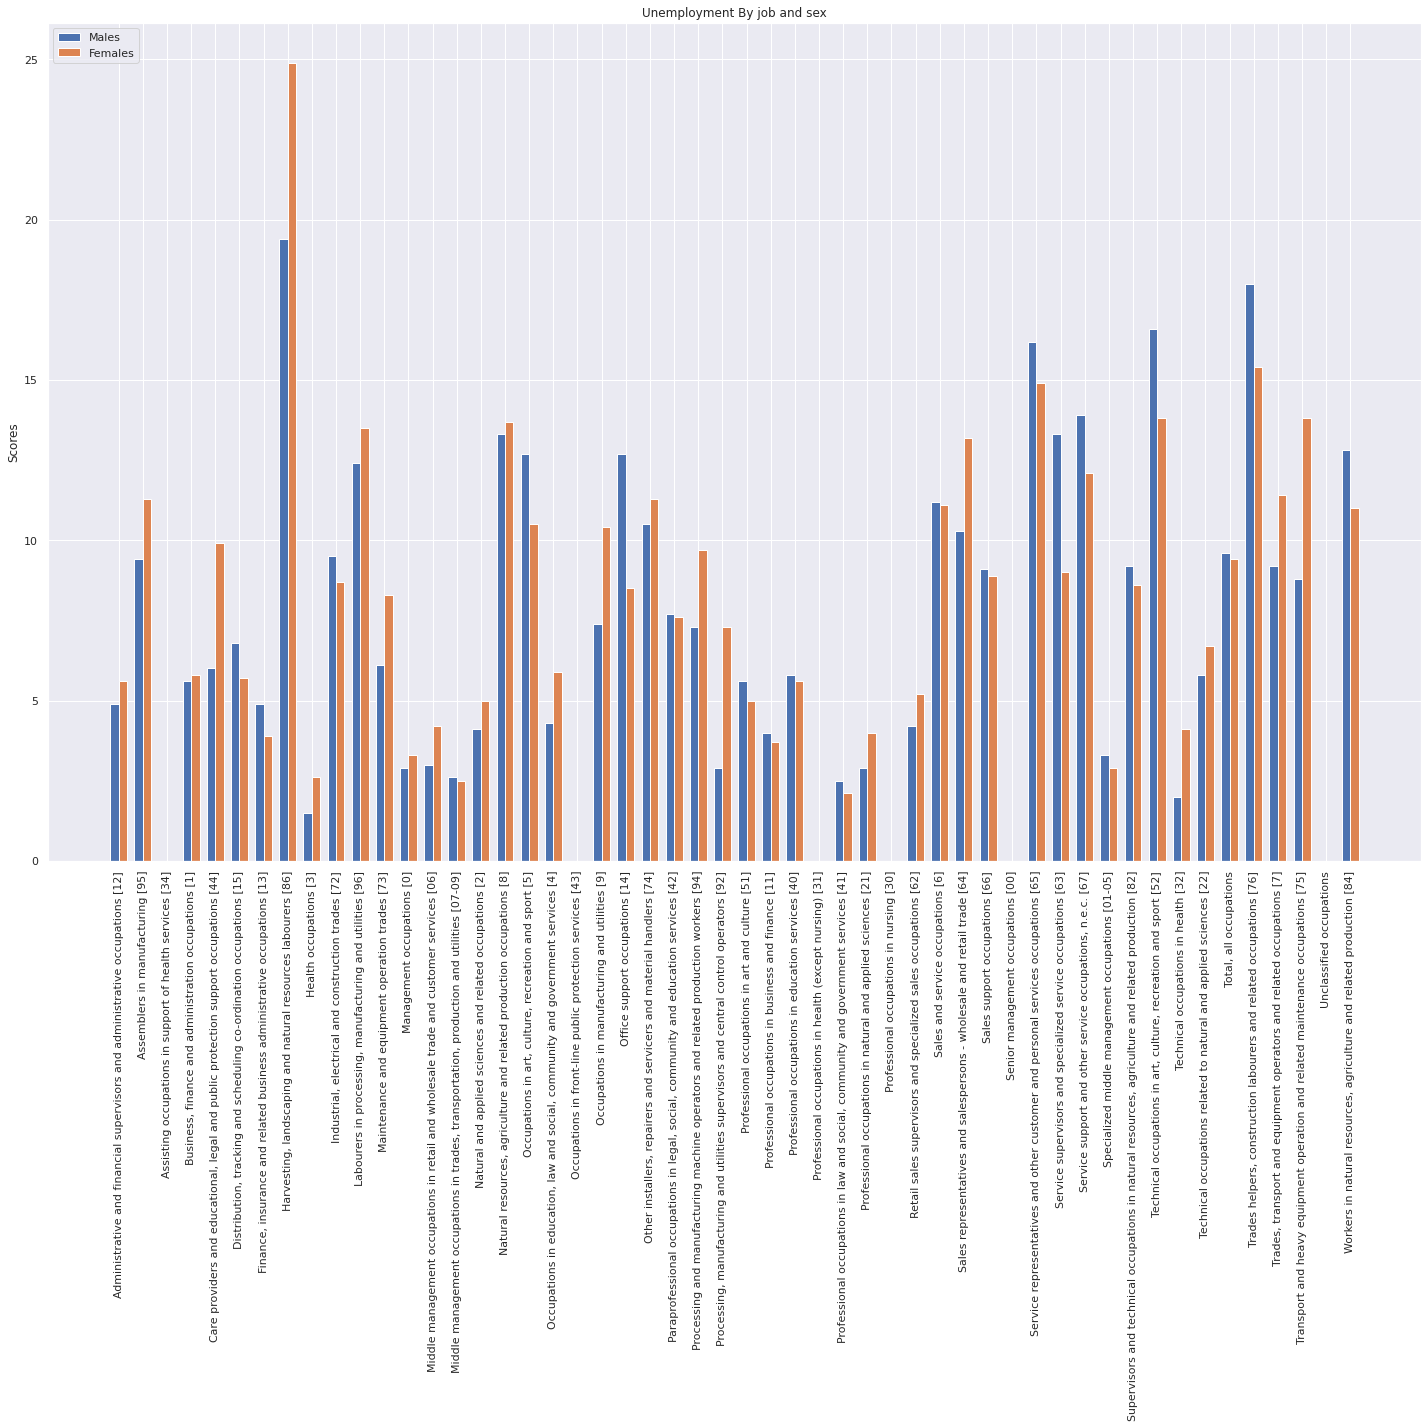

In [120]:
jobindex = [x[3] for x in all_ind_unemp2020Males.index]
maleUnemp = all_ind_unemp2020Males.tolist()
femaleUnemp = all_ind_unemp2020Females.tolist()
x = np.arange(len(jobindex))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x - width/2, maleUnemp, width, label='Males')
rects2 = ax.bar(x + width/2, femaleUnemp, width, label='Females')
plt.xticks(rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Unemployment By job and sex')
ax.set_xticks(x)
ax.set_xticklabels(jobindex)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

However we were interested in how the unemployment rates changed due to covid by industry.  To see this we'll take the difference in percent between 2020 and 2019.

In [121]:
all_ind_unemp_change_Males=occupation_sex_pivot.loc[(2020,'Canada','Males',slice(None)),'Unemployment rate']-occupation_sex_pivot.loc[(2019,'Canada','Males',slice(None)),'Unemployment rate']
all_ind_unemp_change_Females=occupation_sex_pivot.loc[(2020,'Canada','Females',slice(None)),'Unemployment rate']-occupation_sex_pivot.loc[(2019,'Canada','Females',slice(None)),'Unemployment rate']



In [122]:
unemp_2020_Males=occupation_sex_pivot.loc[(2020,'Canada','Males',slice(None)),'Unemployment rate'].reset_index(level=[0,1,2],drop=True)
unemp_2019_Males=occupation_sex_pivot.loc[(2019,'Canada','Males',slice(None)),'Unemployment rate'].reset_index(level=[0,1,2],drop=True)
unemp_2020_Females=occupation_sex_pivot.loc[(2020,'Canada','Females',slice(None)),'Unemployment rate'].reset_index(level=[0,1,2],drop=True)
unemp_2019_Females=occupation_sex_pivot.loc[(2019,'Canada','Females',slice(None)),'Unemployment rate'].reset_index(level=[0,1,2],drop=True)

In [123]:
umemp_change_Males=unemp_2020_Males-unemp_2019_Males
umemp_change_Females=unemp_2020_Females-unemp_2019_Females

In [124]:
# Make certain the indexes are the same before plotting
print(len(umemp_change_Males.index))
print((umemp_change_Males.index==umemp_change_Females.index).sum())

52
52


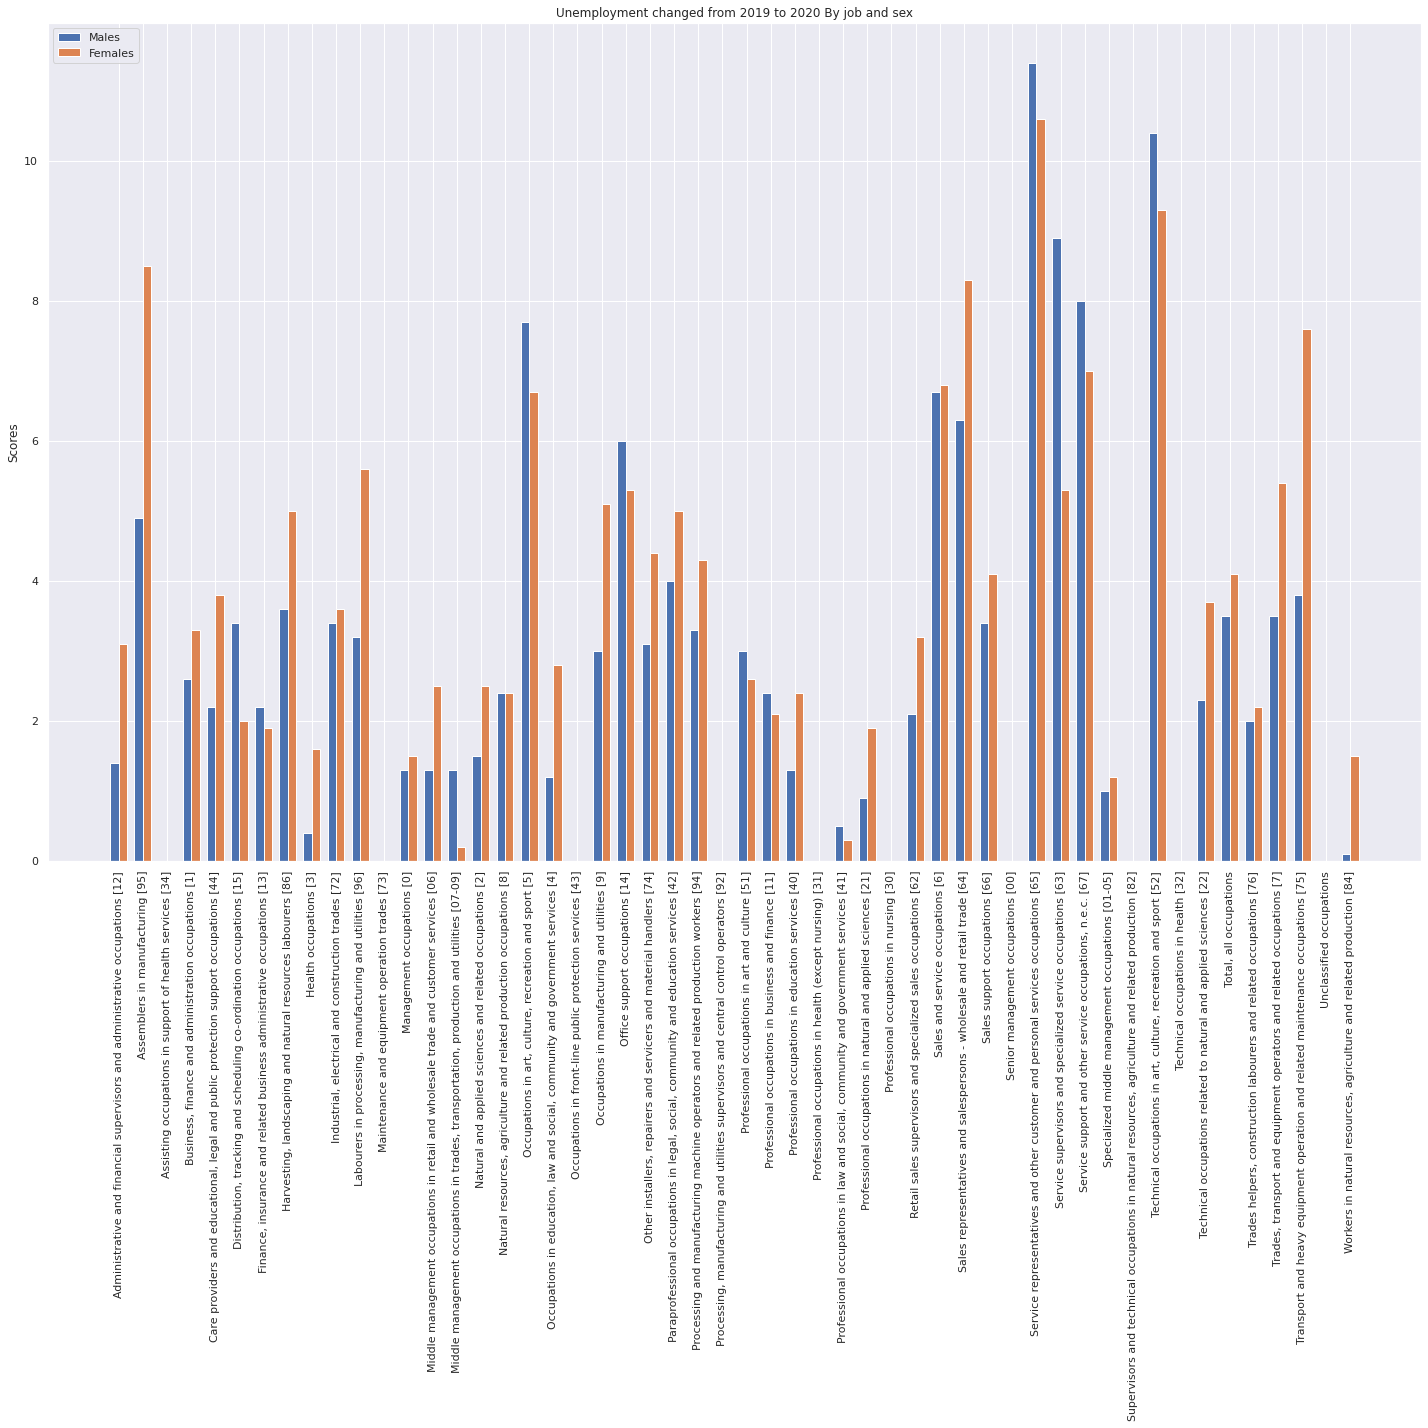

In [125]:
# jobindex = [x[3] for x in all_ind_unemp_change_Males.index]
jobindex=umemp_change_Males.index

# maleUnemp = all_ind_unemp_change_Males.tolist()
# femaleUnemp = all_ind_unemp_change_Females.tolist()
x = np.arange(len(jobindex))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x - width/2, umemp_change_Males, width, label='Males')
rects2 = ax.bar(x + width/2, umemp_change_Females, width, label='Females')
plt.xticks(rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Unemployment changed from 2019 to 2020 By job and sex')
ax.set_xticks(x)
ax.set_xticklabels(jobindex)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Observations

- Across all industries the unemployment went up between 2020 and 2019, no exceptions.


In [126]:
unemp_2020_Males

National Occupational Classification (NOC)
Administrative and financial supervisors and administrative occupations [12]                            4.9
Assemblers in manufacturing [95]                                                                        9.4
Assisting occupations in support of health services [34]                                                NaN
Business, finance and administration occupations [1]                                                    5.6
Care providers and educational, legal and public protection support occupations [44]                    6.0
Distribution, tracking and scheduling co-ordination occupations [15]                                    6.8
Finance, insurance and related business administrative occupations [13]                                 4.9
Harvesting, landscaping and natural resources labourers [86]                                           19.4
Health occupations [3]                                                                       

In [127]:
umemp_change_Males_dropNA=(unemp_2020_Males-unemp_2019_Males).dropna()
umemp_change_Females_dropNA=(unemp_2020_Females-unemp_2019_Females).dropna()

In [128]:
# Make certain the indexes are the same before plotting
print(len(umemp_change_Males_dropNA.index))
print((umemp_change_Males_dropNA.index==umemp_change_Females_dropNA.index).sum())

42
42


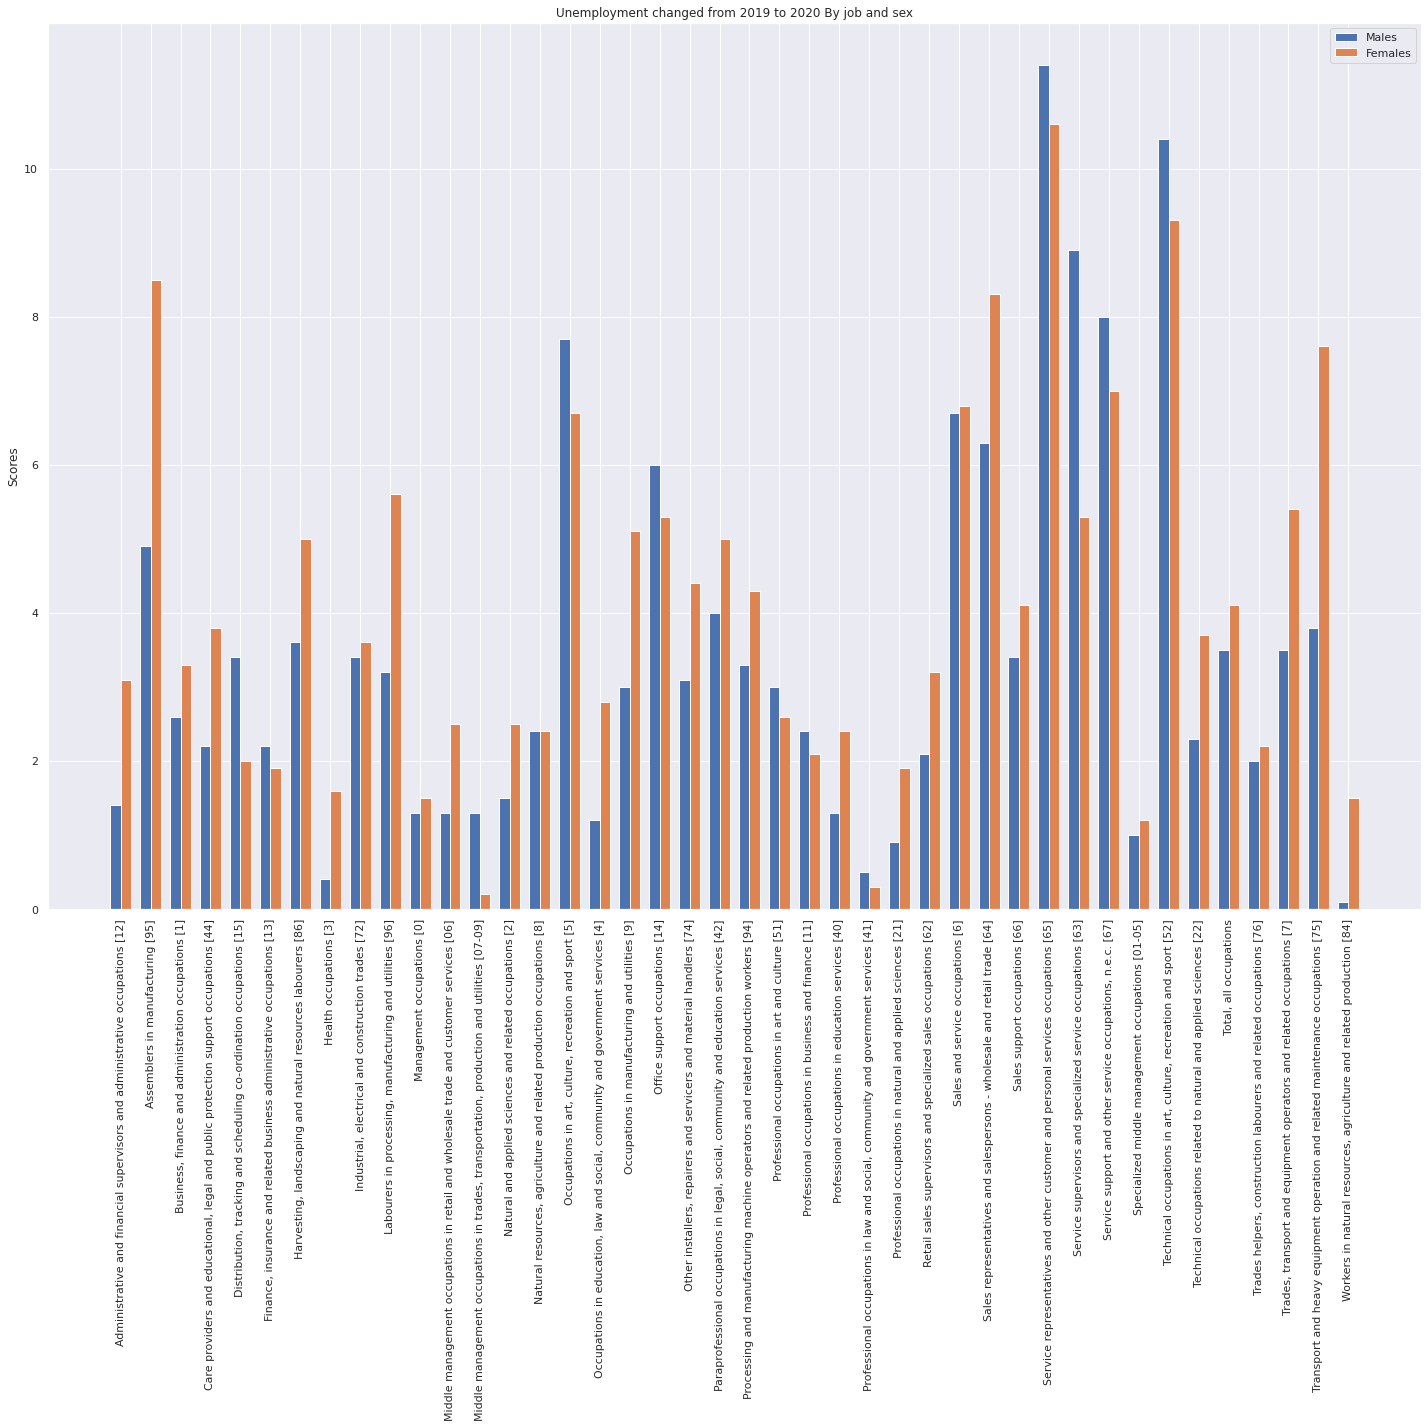

In [129]:
# jobindex = [x[3] for x in all_ind_unemp_change_Males.index]
jobindex=umemp_change_Males_dropNA.index

# maleUnemp = all_ind_unemp_change_Males.tolist()
# femaleUnemp = all_ind_unemp_change_Females.tolist()
x = np.arange(len(jobindex))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x - width/2, umemp_change_Males_dropNA, width, label='Males')
rects2 = ax.bar(x + width/2, umemp_change_Females_dropNA, width, label='Females')
plt.xticks(rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Unemployment changed from 2019 to 2020 By job and sex')
ax.set_xticks(x)
ax.set_xticklabels(jobindex)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [130]:
unemployment_df=pd.DataFrame({'Males': umemp_change_Males_dropNA,'Females': umemp_change_Females_dropNA,})

In [131]:
unemployment_df3=unemployment_df 
unemployment_df3['diff']=unemployment_df3['Females']-unemployment_df3['Males']
unemployment_df3['Male Total'] = ""
unemployment_df3['Male Total'].loc["Total, all occupations"] =  unemployment_df['Males'].loc["Total, all occupations"]
unemployment_df3['Female Total'] = ""
unemployment_df3['Female Total'].loc["Total, all occupations"] =  unemployment_df['Females'].loc["Total, all occupations"]
unemployment_df3['Females'].loc["Total, all occupations"]=None
unemployment_df3['Males'].loc["Total, all occupations"]=None


# jobindex = [x[3] for x in all_ind_unemp_change_Males.index]
jobindex=unemployment_df3.index

# maleUnemp = all_ind_unemp_change_Males.tolist()
# femaleUnemp = all_ind_unemp_change_Females.tolist()
x = np.arange(len(jobindex))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x - width/2, unemployment_df3['Males'], width, label='Males')
rects2 = ax.bar(x + width/2, unemployment_df3['Females'], width, label='Females')

# rects3 = ax.bar(x - width/2, unemployment_df3['Male Total'].loc["Total, all occupations"], width, label='Male Total')
# rects4 = ax.bar(x + width/2, unemployment_df3['Female Total'], width, label='Female Total')
plt.xticks(rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Unemployment changed from 2019 to 2020 By job and sex')
ax.set_xticks(x)
ax.set_xticklabels(jobindex)
ax.legend()
bars = None
bars=ax.bar(x,y)

# print(bars)
bars[1].set_color('orange')
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

NameError: name 'y' is not defined

In [132]:
unemployment_df3.head()

,Males,Females,diff,Male Total,Female Total
National Occupational Classification (NOC),,,,,
Administrative and financial supervisors and administrative occupations [12],1.4,3.1,1.7,,
Assemblers in manufacturing [95],4.9,8.5,3.6,,
"Business, finance and administration occupations [1]",2.6,3.3,0.7,,
"Care providers and educational, legal and public protection support occupations [44]",2.2,3.8,1.6,,
"Distribution, tracking and scheduling co-ordination occupations [15]",3.4,2.0,-1.4,,


In [133]:
sorted_unemp=unemployment_df.sort_values(by='diff')

In [138]:
color_list_gray=['gray']*len(sorted_unemp.index)
color_list_gray[sorted_unemp.index.get_loc('Total, all occupations')]='blue'
color_list_brown=['brown']*len(sorted_unemp.index)
color_list_brown[sorted_unemp.index.get_loc('Total, all occupations')]='red'

In [139]:
sorted_unemp.index.get_loc('Total, all occupations')


18

In [144]:
bb

NameError: name 'bb' is not defined

In [140]:
import matplotlib.patches as mpatches


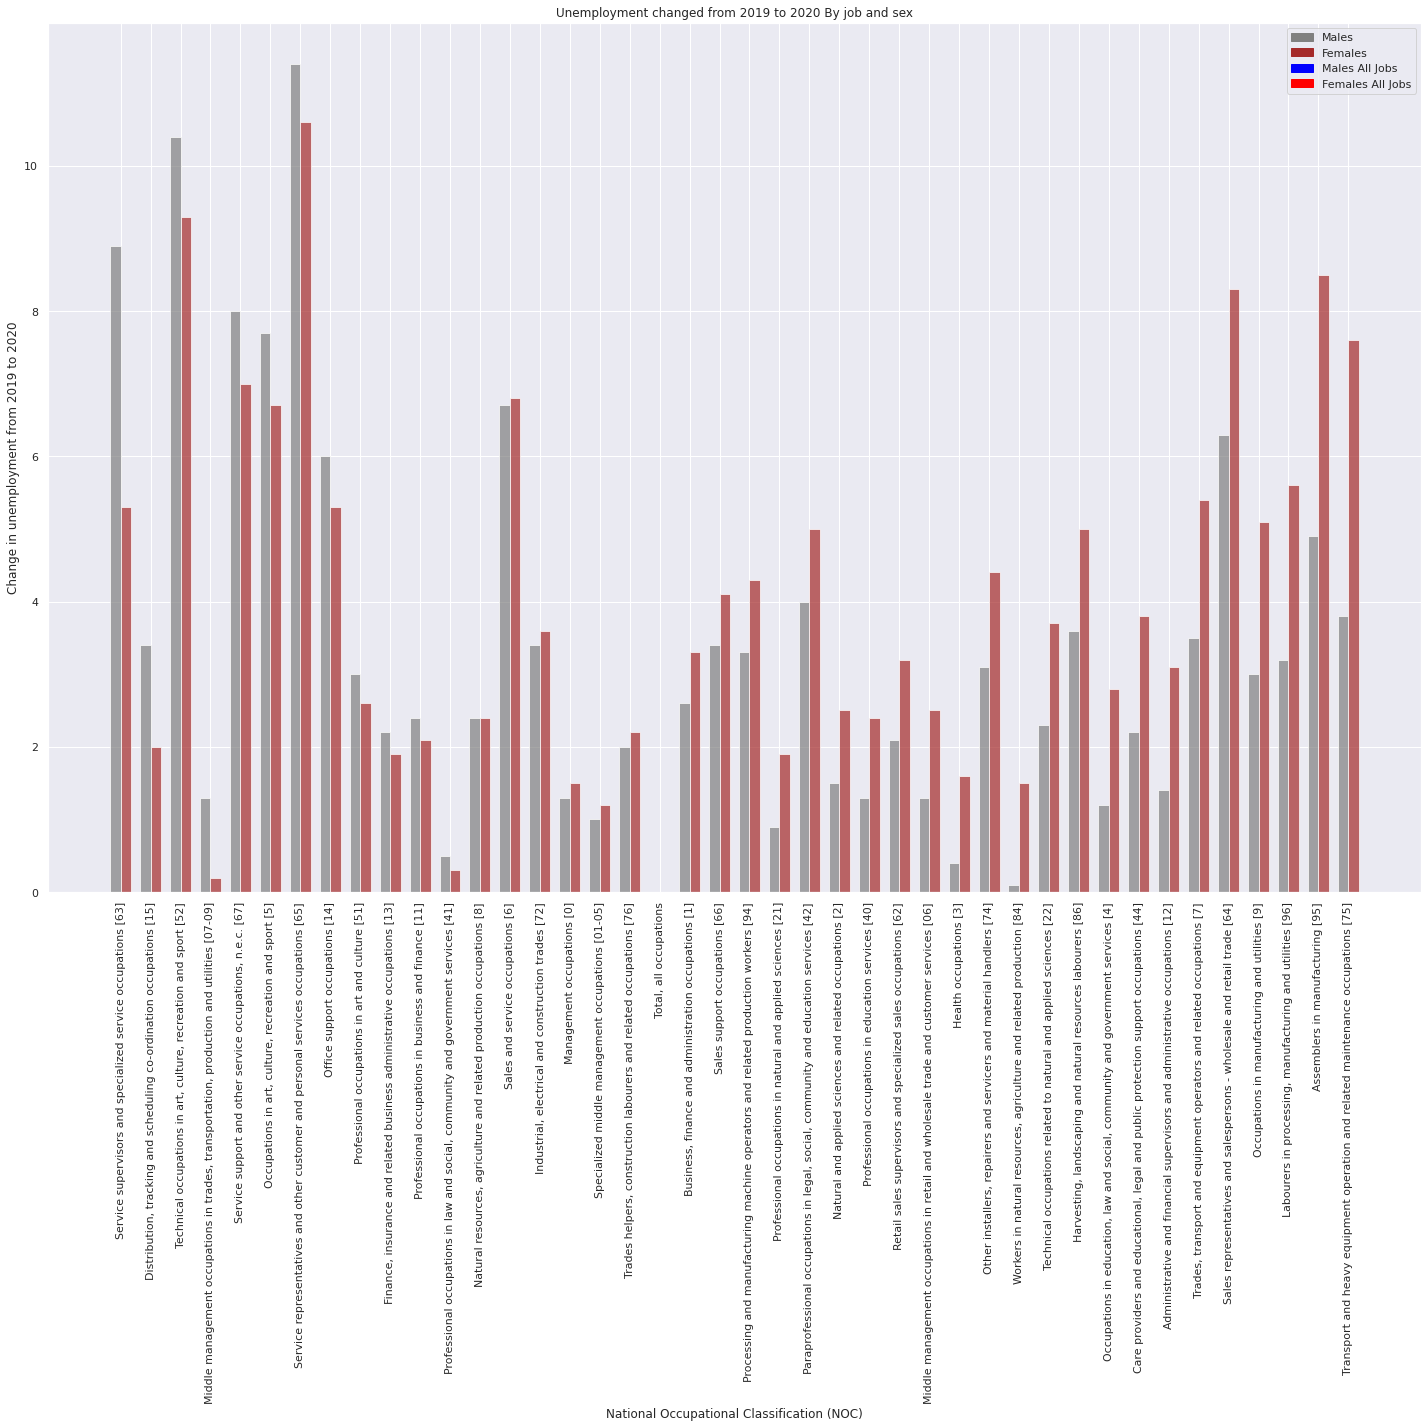

In [142]:
# jobindex = [x[3] for x in all_ind_unemp_change_Males.index]
jobindex=sorted_unemp.index

# maleUnemp = all_ind_unemp_change_Males.tolist()
# femaleUnemp = all_ind_unemp_change_Females.tolist()
x = np.arange(len(jobindex))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,20))
rects1 = ax.bar(x - width/2, sorted_unemp['Males'], width, label='Males',color=color_list_gray, alpha=0.7)
rects2 = ax.bar(x + width/2, sorted_unemp['Females'], width, label='Females', color=color_list_brown,alpha=0.7)
plt.xticks(rotation=90)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Change in unemployment from 2019 to 2020')
ax.set_xlabel('National Occupational Classification (NOC)')

ax.set_title('Unemployment changed from 2019 to 2020 By job and sex')
ax.set_xticks(x)
ax.set_xticklabels(jobindex)
Males_all_occ= mpatches.Patch(color='blue', label='Males All Jobs')
Females_all_occ= mpatches.Patch(color='red', label='Females All Jobs')
Males= mpatches.Patch(color='gray', label='Males')
Females= mpatches.Patch(color='brown', label='Females')
ax.legend(handles=[Males,Females,Males_all_occ,Females_all_occ])

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig("./DeltaUnemploymentByJob.png")

plt.show()

In [70]:
sorted_unemp['Males']['Total, all occupations']

3.5

In [71]:
sorted_unemp['Females']['Total, all occupations']

4.1000000000000005

In [72]:
# Most umemployed women
sorted_unemp.tail(5)

,Males,Females,diff
National Occupational Classification (NOC),,,
Sales representatives and salespersons - wholesale and retail trade [64],6.3,8.3,2.0
Occupations in manufacturing and utilities [9],3.0,5.1,2.1
"Labourers in processing, manufacturing and utilities [96]",3.2,5.6,2.4
Assemblers in manufacturing [95],4.9,8.5,3.6
Transport and heavy equipment operation and related maintenance occupations [75],3.8,7.6,3.8


In [73]:
# Most umemployed men
sorted_unemp.head(5)

,Males,Females,diff
National Occupational Classification (NOC),,,
Service supervisors and specialized service occupations [63],8.9,5.3,-3.6
"Distribution, tracking and scheduling co-ordination occupations [15]",3.4,2.0,-1.4
"Technical occupations in art, culture, recreation and sport [52]",10.4,9.3,-1.1
"Middle management occupations in trades, transportation, production and utilities [07-09]",1.3,0.2,-1.1
"Service support and other service occupations, n.e.c. [67]",8.0,7.0,-1.0


Let's look at the correlation between difference in increase in umployment and the sex ratio of the industries.



In [78]:
unemp_labourforce_2020_Males=occupation_sex_pivot.loc[(2020,'Canada','Males',slice(None)),('Unemployment rate','Labour force')].reset_index(level=[0,1,2],drop=True)
unemp_labourforce_2019_Males=occupation_sex_pivot.loc[(2019,'Canada','Males',slice(None)),('Unemployment rate','Labour force')].reset_index(level=[0,1,2],drop=True)
unemp_labourforce_2020_Females=occupation_sex_pivot.loc[(2020,'Canada','Females',slice(None)),('Unemployment rate','Labour force')].reset_index(level=[0,1,2],drop=True)
unemp_labourforce_2019_Females=occupation_sex_pivot.loc[(2019,'Canada','Females',slice(None)),('Unemployment rate','Labour force')].reset_index(level=[0,1,2],drop=True)

In [73]:
unemp_labourforce_2020_Males.head(10)


NameError: name 'unemp_labourforce_2020_Males' is not defined

In [83]:
unemployment_df_2=pd.DataFrame({'Males Unemp 20': unemp_labourforce_2020_Males['Unemployment rate'],'Male Labour Force 20': unemp_labourforce_2020_Males['Labour force'],'Females Unemp 20': unemp_labourforce_2020_Females['Unemployment rate'],'Female Labour Force 20': unemp_labourforce_2020_Females['Labour force'],'Males Unemp 19': unemp_labourforce_2019_Males['Unemployment rate'],'Male Labour Force 19': unemp_labourforce_2019_Males['Labour force'],'Females Unemp 19': unemp_labourforce_2019_Females['Unemployment rate'],'Female Labour Force 19': unemp_labourforce_2019_Females['Labour force']})

In [84]:
unemployment_df_2.head()

,Males Unemp 20,Male Labour Force 20,Females Unemp 20,Female Labour Force 20,Males Unemp 19,Male Labour Force 19,Females Unemp 19,Female Labour Force 19
National Occupational Classification (NOC),,,,,,,,
Administrative and financial supervisors and administrative occupations [12],4.9,243.9,5.6,783.2,3.5,234.2,2.5,819.7
Assemblers in manufacturing [95],9.4,145.2,11.3,43.4,4.5,159.9,2.8,52.9
Assisting occupations in support of health services [34],NaN,48.5,NaN,306.4,NaN,46.5,NaN,325.4
"Business, finance and administration occupations [1]",5.6,1008.6,5.8,2174.0,3.0,972.5,2.5,2138.1
"Care providers and educational, legal and public protection support occupations [44]",6.0,44.7,9.9,208.8,3.8,47.1,6.1,224.2


In [85]:
unemployment_df_2['Delta Male Unemp']=unemployment_df_2['Males Unemp 20']-unemployment_df_2['Males Unemp 19']
unemployment_df_2['Delta Female Unemp']=unemployment_df_2['Females Unemp 20']-unemployment_df_2['Females Unemp 19']

,Males Unemp 20,Male Labour Force 20,Females Unemp 20,Female Labour Force 20,Males Unemp 19,Male Labour Force 19,Females Unemp 19,Female Labour Force 19,Delta Male Unemp,Delta Female Unemp
National Occupational Classification (NOC),,,,,,,,,,
Administrative and financial supervisors and administrative occupations [12],4.9,243.9,5.6,783.2,3.5,234.2,2.5,819.7,1.4,3.1
Assemblers in manufacturing [95],9.4,145.2,11.3,43.4,4.5,159.9,2.8,52.9,4.9,8.5
Assisting occupations in support of health services [34],NaN,48.5,NaN,306.4,NaN,46.5,NaN,325.4,NaN,NaN
"Business, finance and administration occupations [1]",5.6,1008.6,5.8,2174.0,3.0,972.5,2.5,2138.1,2.6,3.3
"Care providers and educational, legal and public protection support occupations [44]",6.0,44.7,9.9,208.8,3.8,47.1,6.1,224.2,2.2,3.8


In [180]:
unemployment_df_2['Delta Delta Unemp']= unemployment_df_2['Delta Female Unemp']-unemployment_df_2['Delta Male Unemp']
unemployment_df_2['Female Labour Force Ratio']= unemployment_df_2['Female Labour Force 20']/(unemployment_df_2['Female Labour Force 20']+unemployment_df_2['Male Labour Force 20'])

In [181]:
unemployment_df_2.head()


,Males Unemp 20,Male Labour Force 20,Females Unemp 20,Female Labour Force 20,Males Unemp 19,Male Labour Force 19,Females Unemp 19,Female Labour Force 19,Delta Male Unemp,Delta Female Unemp,Delta Delta Unemp,Female Labour Force Ratio
National Occupational Classification (NOC),,,,,,,,,,,,
Administrative and financial supervisors and administrative occupations [12],4.9,243.9,5.6,783.2,3.5,234.2,2.5,819.7,1.4,3.1,1.7,0.762535
Assemblers in manufacturing [95],9.4,145.2,11.3,43.4,4.5,159.9,2.8,52.9,4.9,8.5,3.6,0.230117
Assisting occupations in support of health services [34],NaN,48.5,NaN,306.4,NaN,46.5,NaN,325.4,NaN,NaN,NaN,0.863342
"Business, finance and administration occupations [1]",5.6,1008.6,5.8,2174.0,3.0,972.5,2.5,2138.1,2.6,3.3,0.7,0.683089
"Care providers and educational, legal and public protection support occupations [44]",6.0,44.7,9.9,208.8,3.8,47.1,6.1,224.2,2.2,3.8,1.6,0.823669


In [182]:
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm

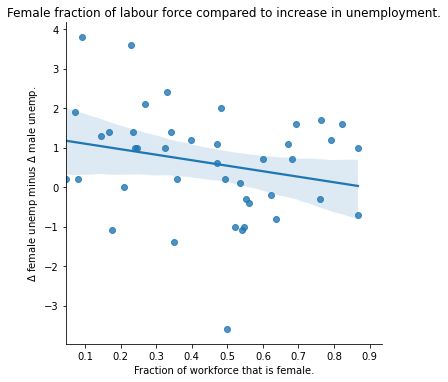

In [192]:

g = sns.lmplot(x='Female Labour Force Ratio', y='Delta Delta Unemp', data=unemployment_df_2)
g.set(title="Female fraction of labour force compared to increase in unemployment.")
g.set_axis_labels('Fraction of workforce that is female.', "$\Delta$ female unemp minus $\Delta$ male unemp.")
g.savefig("./DeltaUnemploymentGenderRatio.png")


NameError: name 'sexRatioUnempt' is not defined

In [106]:
df_dropNA=unemployment_df_2.dropna()
Y = df_dropNA['Delta Delta Unemp']
X = df_dropNA['Female Labour Force Ratio']
X = sm.add_constant(X)

In [107]:
results = sm.OLS( Y, X ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Delta Delta Unemp   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     2.436
Date:                Sun, 04 Apr 2021   Prob (F-statistic):              0.126
Time:                        13:03:18   Log-Likelihood:                -70.966
No. Observations:                  42   AIC:                             145.9
Df Residuals:                      40   BIC:                             149.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.2378      0.450      2.750      0.009       0.328       2.147
Female Labour Force Ratio    -1.3952      0.894     -1.561      0.126      -3.202       0.412
==============================================================================
Omnibus:                        4.441   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.263
Skew:                          -0.483   Prob(JB):                        0.196
Kurtosis:                       3.965   Cond. No.                         5.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
results.params

const                        1.237763
Female Labour Force Ratio   -1.395211
dtype: float64

In [109]:
Y.isna().sum()

0

In [110]:
X.isna().sum()

const                        0
Female Labour Force Ratio    0
dtype: int64